In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp

import random

In [5]:
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3.5, "grid.linewidth": 0.2})

plt.rcParams['figure.figsize'] = 14, 8

# Raw Data From Keras

In [6]:
raw_data = '''
Epoch 1/50
6502/6503 [============================>.] - ETA: 0s - loss: 2.1033 - acc: 0.4008Epoch 00001: val_loss improved from inf to 1.69932, saving model to models/ethereum.h5
6503/6503 [==============================] - 1043s 160ms/step - loss: 2.1032 - acc: 0.4008 - val_loss: 1.6993 - val_acc: 0.5093
Epoch 2/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.7002 - acc: 0.5050Epoch 00002: val_loss improved from 1.69932 to 1.54410, saving model to models/ethereum.h5
6503/6503 [==============================] - 794s 122ms/step - loss: 1.7002 - acc: 0.5050 - val_loss: 1.5441 - val_acc: 0.5499
Epoch 3/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.5978 - acc: 0.5315Epoch 00003: val_loss improved from 1.54410 to 1.48191, saving model to models/ethereum.h5
6503/6503 [==============================] - 988s 152ms/step - loss: 1.5977 - acc: 0.5315 - val_loss: 1.4819 - val_acc: 0.5666
Epoch 4/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.5458 - acc: 0.5445Epoch 00004: val_loss improved from 1.48191 to 1.44457, saving model to models/ethereum.h5
6503/6503 [==============================] - 1051s 162ms/step - loss: 1.5458 - acc: 0.5446 - val_loss: 1.4446 - val_acc: 0.5734
Epoch 5/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.5118 - acc: 0.5533Epoch 00005: val_loss improved from 1.44457 to 1.42305, saving model to models/ethereum.h5
6503/6503 [==============================] - 1012s 156ms/step - loss: 1.5117 - acc: 0.5533 - val_loss: 1.4230 - val_acc: 0.5803
Epoch 6/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.4888 - acc: 0.5589Epoch 00006: val_loss improved from 1.42305 to 1.40166, saving model to models/ethereum.h5
6503/6503 [==============================] - 1008s 155ms/step - loss: 1.4888 - acc: 0.5589 - val_loss: 1.4017 - val_acc: 0.5854
Epoch 7/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.4730 - acc: 0.5626Epoch 00007: val_loss improved from 1.40166 to 1.38922, saving model to models/ethereum.h5
6503/6503 [==============================] - 1015s 156ms/step - loss: 1.4730 - acc: 0.5626 - val_loss: 1.3892 - val_acc: 0.5889
Epoch 8/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.4585 - acc: 0.5664Epoch 00008: val_loss improved from 1.38922 to 1.37852, saving model to models/ethereum.h5
6503/6503 [==============================] - 1026s 158ms/step - loss: 1.4585 - acc: 0.5664 - val_loss: 1.3785 - val_acc: 0.5912
Epoch 9/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.4485 - acc: 0.5689Epoch 00009: val_loss improved from 1.37852 to 1.37210, saving model to models/ethereum.h5
6503/6503 [==============================] - 1030s 158ms/step - loss: 1.4485 - acc: 0.5689 - val_loss: 1.3721 - val_acc: 0.5934
Epoch 10/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.4392 - acc: 0.5709Epoch 00010: val_loss improved from 1.37210 to 1.36497, saving model to models/ethereum.h5
6503/6503 [==============================] - 1042s 160ms/step - loss: 1.4392 - acc: 0.5709 - val_loss: 1.3650 - val_acc: 0.5951
Epoch 11/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.4305 - acc: 0.5730Epoch 00011: val_loss improved from 1.36497 to 1.36040, saving model to models/ethereum.h5
6503/6503 [==============================] - 1329s 204ms/step - loss: 1.4305 - acc: 0.5730 - val_loss: 1.3604 - val_acc: 0.5951
Epoch 12/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.4248 - acc: 0.5748Epoch 00012: val_loss improved from 1.36040 to 1.35385, saving model to models/ethereum.h5
6503/6503 [==============================] - 1086s 167ms/step - loss: 1.4248 - acc: 0.5748 - val_loss: 1.3538 - val_acc: 0.5981
Epoch 13/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.4178 - acc: 0.5764Epoch 00013: val_loss improved from 1.35385 to 1.34592, saving model to models/ethereum.h5
6503/6503 [==============================] - 1131s 174ms/step - loss: 1.4178 - acc: 0.5764 - val_loss: 1.3459 - val_acc: 0.5994
Epoch 14/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.4141 - acc: 0.5773Epoch 00014: val_loss improved from 1.34592 to 1.34136, saving model to models/ethereum.h5
6503/6503 [==============================] - 1027s 158ms/step - loss: 1.4141 - acc: 0.5773 - val_loss: 1.3414 - val_acc: 0.6002
Epoch 15/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.4089 - acc: 0.5783Epoch 00015: val_loss improved from 1.34136 to 1.34120, saving model to models/ethereum.h5
6503/6503 [==============================] - 883s 136ms/step - loss: 1.4089 - acc: 0.5783 - val_loss: 1.3412 - val_acc: 0.6002
Epoch 16/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.4047 - acc: 0.5792Epoch 00016: val_loss improved from 1.34120 to 1.33594, saving model to models/ethereum.h5
6503/6503 [==============================] - 912s 140ms/step - loss: 1.4047 - acc: 0.5792 - val_loss: 1.3359 - val_acc: 0.6023
Epoch 17/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.4010 - acc: 0.5804Epoch 00017: val_loss improved from 1.33594 to 1.33460, saving model to models/ethereum.h5
6503/6503 [==============================] - 1074s 165ms/step - loss: 1.4010 - acc: 0.5804 - val_loss: 1.3346 - val_acc: 0.6024
Epoch 18/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.3974 - acc: 0.5817Epoch 00018: val_loss improved from 1.33460 to 1.33016, saving model to models/ethereum.h5
6503/6503 [==============================] - 1081s 166ms/step - loss: 1.3974 - acc: 0.5817 - val_loss: 1.3302 - val_acc: 0.6029
Epoch 19/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.3952 - acc: 0.5820Epoch 00019: val_loss improved from 1.33016 to 1.32863, saving model to models/ethereum.h5
6503/6503 [==============================] - 1109s 171ms/step - loss: 1.3952 - acc: 0.5821 - val_loss: 1.3286 - val_acc: 0.6045
Epoch 20/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.3929 - acc: 0.5828Epoch 00020: val_loss improved from 1.32863 to 1.32789, saving model to models/ethereum.h5
6503/6503 [==============================] - 881s 135ms/step - loss: 1.3928 - acc: 0.5828 - val_loss: 1.3279 - val_acc: 0.6043
Epoch 21/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.3893 - acc: 0.5839Epoch 00021: val_loss improved from 1.32789 to 1.32484, saving model to models/ethereum.h5
6503/6503 [==============================] - 842s 129ms/step - loss: 1.3893 - acc: 0.5839 - val_loss: 1.3248 - val_acc: 0.6053
Epoch 22/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.3859 - acc: 0.5844Epoch 00022: val_loss improved from 1.32484 to 1.32237, saving model to models/ethereum.h5
6503/6503 [==============================] - 798s 123ms/step - loss: 1.3859 - acc: 0.5844 - val_loss: 1.3224 - val_acc: 0.6058
Epoch 23/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.3843 - acc: 0.5850Epoch 00023: val_loss improved from 1.32237 to 1.32188, saving model to models/ethereum.h5
6503/6503 [==============================] - 796s 122ms/step - loss: 1.3843 - acc: 0.5850 - val_loss: 1.3219 - val_acc: 0.6060
Epoch 24/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.3815 - acc: 0.5860Epoch 00024: val_loss improved from 1.32188 to 1.32152, saving model to models/ethereum.h5
6503/6503 [==============================] - 863s 133ms/step - loss: 1.3815 - acc: 0.5860 - val_loss: 1.3215 - val_acc: 0.6065
Epoch 25/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.3797 - acc: 0.5858Epoch 00025: val_loss improved from 1.32152 to 1.31619, saving model to models/ethereum.h5
6503/6503 [==============================] - 1007s 155ms/step - loss: 1.3797 - acc: 0.5858 - val_loss: 1.3162 - val_acc: 0.6068
Epoch 26/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.3777 - acc: 0.5869Epoch 00026: val_loss improved from 1.31619 to 1.31567, saving model to models/ethereum.h5
6503/6503 [==============================] - 1002s 154ms/step - loss: 1.3777 - acc: 0.5869 - val_loss: 1.3157 - val_acc: 0.6082
Epoch 27/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.3768 - acc: 0.5873Epoch 00027: val_loss improved from 1.31567 to 1.31504, saving model to models/ethereum.h5
6503/6503 [==============================] - 1007s 155ms/step - loss: 1.3768 - acc: 0.5873 - val_loss: 1.3150 - val_acc: 0.6079
Epoch 28/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.3751 - acc: 0.5875Epoch 00028: val_loss improved from 1.31504 to 1.31503, saving model to models/ethereum.h5
6503/6503 [==============================] - 1002s 154ms/step - loss: 1.3751 - acc: 0.5875 - val_loss: 1.3150 - val_acc: 0.6077
Epoch 29/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.3736 - acc: 0.5880Epoch 00029: val_loss improved from 1.31503 to 1.31439, saving model to models/ethereum.h5
6503/6503 [==============================] - 1006s 155ms/step - loss: 1.3736 - acc: 0.5880 - val_loss: 1.3144 - val_acc: 0.6079
Epoch 30/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.3705 - acc: 0.5889Epoch 00030: val_loss improved from 1.31439 to 1.31203, saving model to models/ethereum.h5
6503/6503 [==============================] - 1004s 154ms/step - loss: 1.3705 - acc: 0.5889 - val_loss: 1.3120 - val_acc: 0.6085
Epoch 31/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.3703 - acc: 0.5884Epoch 00031: val_loss improved from 1.31203 to 1.30941, saving model to models/ethereum.h5
6503/6503 [==============================] - 1003s 154ms/step - loss: 1.3703 - acc: 0.5884 - val_loss: 1.3094 - val_acc: 0.6099
Epoch 32/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.3679 - acc: 0.5894Epoch 00032: val_loss did not improve
6503/6503 [==============================] - 1001s 154ms/step - loss: 1.3679 - acc: 0.5894 - val_loss: 1.3113 - val_acc: 0.6090
Epoch 33/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.3670 - acc: 0.5897Epoch 00033: val_loss improved from 1.30941 to 1.30745, saving model to models/ethereum.h5
6503/6503 [==============================] - 950s 146ms/step - loss: 1.3670 - acc: 0.5897 - val_loss: 1.3075 - val_acc: 0.6100
Epoch 34/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.3662 - acc: 0.5903Epoch 00034: val_loss improved from 1.30745 to 1.30741, saving model to models/ethereum.h5
6503/6503 [==============================] - 866s 133ms/step - loss: 1.3662 - acc: 0.5903 - val_loss: 1.3074 - val_acc: 0.6107
Epoch 35/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.3644 - acc: 0.5901Epoch 00035: val_loss improved from 1.30741 to 1.30653, saving model to models/ethereum.h5
6503/6503 [==============================] - 855s 131ms/step - loss: 1.3644 - acc: 0.5901 - val_loss: 1.3065 - val_acc: 0.6102
Epoch 36/50
6502/6503 [============================>.] - ETA: 0s - loss: 1.3633 - acc: 0.5910Epoch 00036: val_loss did not improve
6503/6503 [==============================] - 896s 138ms/step - loss: 1.3633 - acc: 0.5910 - val_loss: 1.3071 - val_acc: 0.6112
Epoch 1/50
10837/10838 [============================>.] - ETA: 0s - loss: 1.3892 - acc: 0.5861Epoch 00001: val_loss improved from inf to 1.29560, saving model to models/ethereum.h5
10838/10838 [==============================] - 1407s 130ms/step - loss: 1.3892 - acc: 0.5861 - val_loss: 1.2956 - val_acc: 0.6120
Epoch 2/50
10837/10838 [============================>.] - ETA: 0s - loss: 1.3796 - acc: 0.5884Epoch 00002: val_loss improved from 1.29560 to 1.29362, saving model to models/ethereum.h5
10838/10838 [==============================] - 2024s 187ms/step - loss: 1.3796 - acc: 0.5884 - val_loss: 1.2936 - val_acc: 0.6130
Epoch 3/50
10837/10838 [============================>.] - ETA: 0s - loss: 1.3748 - acc: 0.5898Epoch 00003: val_loss improved from 1.29362 to 1.29091, saving model to models/ethereum.h5
10838/10838 [==============================] - 1500s 138ms/step - loss: 1.3748 - acc: 0.5898 - val_loss: 1.2909 - val_acc: 0.6145
Epoch 4/50
10837/10838 [============================>.] - ETA: 0s - loss: 1.3705 - acc: 0.5905Epoch 00004: val_loss improved from 1.29091 to 1.28807, saving model to models/ethereum.h5
10838/10838 [==============================] - 1485s 137ms/step - loss: 1.3705 - acc: 0.5905 - val_loss: 1.2881 - val_acc: 0.6150
Epoch 5/50
10837/10838 [============================>.] - ETA: 0s - loss: 1.3677 - acc: 0.5913Epoch 00005: val_loss did not improve
10838/10838 [==============================] - 2083s 192ms/step - loss: 1.3677 - acc: 0.5913 - val_loss: 1.2887 - val_acc: 0.6147
Epoch 6/50
10837/10838 [============================>.] - ETA: 0s - loss: 1.3646 - acc: 0.5926Epoch 00006: val_loss improved from 1.28807 to 1.28361, saving model to models/ethereum.h5
10838/10838 [==============================] - 1835s 169ms/step - loss: 1.3646 - acc: 0.5926 - val_loss: 1.2836 - val_acc: 0.6166
Epoch 7/50
10837/10838 [============================>.] - ETA: 0s - loss: 1.3614 - acc: 0.5930Epoch 00007: val_loss improved from 1.28361 to 1.28254, saving model to models/ethereum.h5
10838/10838 [==============================] - 1450s 134ms/step - loss: 1.3614 - acc: 0.5931 - val_loss: 1.2825 - val_acc: 0.6173
Epoch 8/50
10837/10838 [============================>.] - ETA: 0s - loss: 1.3594 - acc: 0.5935Epoch 00008: val_loss improved from 1.28254 to 1.27939, saving model to models/ethereum.h5
10838/10838 [==============================] - 1544s 142ms/step - loss: 1.3594 - acc: 0.5935 - val_loss: 1.2794 - val_acc: 0.6176
Epoch 9/50
10837/10838 [============================>.] - ETA: 0s - loss: 1.3574 - acc: 0.5939Epoch 00009: val_loss did not improve
10838/10838 [==============================] - 2126s 196ms/step - loss: 1.3574 - acc: 0.5939 - val_loss: 1.2801 - val_acc: 0.6180
Epoch 10/50
10837/10838 [============================>.] - ETA: 0s - loss: 1.3557 - acc: 0.5946Epoch 00010: val_loss improved from 1.27939 to 1.27713, saving model to models/ethereum.h5
10838/10838 [==============================] - 1899s 175ms/step - loss: 1.3557 - acc: 0.5946 - val_loss: 1.2771 - val_acc: 0.6183
Epoch 11/50
10837/10838 [============================>.] - ETA: 0s - loss: 1.3538 - acc: 0.5949Epoch 00011: val_loss improved from 1.27713 to 1.27529, saving model to models/ethereum.h5
10838/10838 [==============================] - 1835s 169ms/step - loss: 1.3538 - acc: 0.5949 - val_loss: 1.2753 - val_acc: 0.6183
Epoch 1/50
10837/10838 [============================>.] - ETA: 0s - loss: 1.3517 - acc: 0.5960Epoch 00001: val_loss improved from inf to 1.27562, saving model to models/ethereum.h5
10838/10838 [==============================] - 1911s 176ms/step - loss: 1.3517 - acc: 0.5960 - val_loss: 1.2756 - val_acc: 0.6192
Epoch 2/50
10837/10838 [============================>.] - ETA: 0s - loss: 1.3501 - acc: 0.5957Epoch 00002: val_loss improved from 1.27562 to 1.27399, saving model to models/ethereum.h5
10838/10838 [==============================] - 2283s 211ms/step - loss: 1.3501 - acc: 0.5957 - val_loss: 1.2740 - val_acc: 0.6195
Epoch 3/50
10837/10838 [============================>.] - ETA: 0s - loss: 1.3490 - acc: 0.5963Epoch 00003: val_loss improved from 1.27399 to 1.27357, saving model to models/ethereum.h5
10838/10838 [==============================] - 1895s 175ms/step - loss: 1.3490 - acc: 0.5963 - val_loss: 1.2736 - val_acc: 0.6199
Epoch 4/50
10837/10838 [============================>.] - ETA: 0s - loss: 1.3474 - acc: 0.5971Epoch 00004: val_loss improved from 1.27357 to 1.27312, saving model to models/ethereum.h5
10838/10838 [==============================] - 1286s 119ms/step - loss: 1.3474 - acc: 0.5971 - val_loss: 1.2731 - val_acc: 0.6196
Epoch 5/50
10837/10838 [============================>.] - ETA: 0s - loss: 1.3466 - acc: 0.5969Epoch 00005: val_loss improved from 1.27312 to 1.27117, saving model to models/ethereum.h5
10838/10838 [==============================] - 1284s 118ms/step - loss: 1.3466 - acc: 0.5969 - val_loss: 1.2712 - val_acc: 0.6203
Epoch 6/50
10837/10838 [============================>.] - ETA: 0s - loss: 1.3443 - acc: 0.5976Epoch 00006: val_loss improved from 1.27117 to 1.26741, saving model to models/ethereum.h5
10838/10838 [==============================] - 1282s 118ms/step - loss: 1.3442 - acc: 0.5976 - val_loss: 1.2674 - val_acc: 0.6213
Epoch 7/50
10837/10838 [============================>.] - ETA: 0s - loss: 1.3426 - acc: 0.5984Epoch 00007: val_loss did not improve
10838/10838 [==============================] - 1282s 118ms/step - loss: 1.3426 - acc: 0.5984 - val_loss: 1.2687 - val_acc: 0.6212
Epoch 8/50
10837/10838 [============================>.] - ETA: 0s - loss: 1.3090 - acc: 0.6074Epoch 00008: val_loss improved from 1.26741 to 1.23976, saving model to models/ethereum.h5
10838/10838 [==============================] - 1281s 118ms/step - loss: 1.3090 - acc: 0.6074 - val_loss: 1.2398 - val_acc: 0.6291
Epoch 9/50
10837/10838 [============================>.] - ETA: 0s - loss: 1.2977 - acc: 0.6101Epoch 00009: val_loss improved from 1.23976 to 1.23568, saving model to models/ethereum.h5
10838/10838 [==============================] - 1281s 118ms/step - loss: 1.2977 - acc: 0.6101 - val_loss: 1.2357 - val_acc: 0.6302
Epoch 10/50
10837/10838 [============================>.] - ETA: 0s - loss: 1.2928 - acc: 0.6114Epoch 00010: val_loss improved from 1.23568 to 1.23335, saving model to models/ethereum.h5
10838/10838 [==============================] - 1277s 118ms/step - loss: 1.2928 - acc: 0.6114 - val_loss: 1.2334 - val_acc: 0.6308
Epoch 11/50
10837/10838 [============================>.] - ETA: 0s - loss: 1.2894 - acc: 0.6122Epoch 00011: val_loss improved from 1.23335 to 1.23065, saving model to models/ethereum.h5
10838/10838 [==============================] - 1275s 118ms/step - loss: 1.2894 - acc: 0.6122 - val_loss: 1.2306 - val_acc: 0.6318
Epoch 12/50
10837/10838 [============================>.] - ETA: 0s - loss: 1.2875 - acc: 0.6128Epoch 00012: val_loss improved from 1.23065 to 1.22947, saving model to models/ethereum.h5
10838/10838 [==============================] - 1274s 118ms/step - loss: 1.2875 - acc: 0.6128 - val_loss: 1.2295 - val_acc: 0.6322
Epoch 13/50
10837/10838 [============================>.] - ETA: 0s - loss: 1.2852 - acc: 0.6135Epoch 00013: val_loss improved from 1.22947 to 1.22760, saving model to models/ethereum.h5
10838/10838 [==============================] - 1274s 118ms/step - loss: 1.2852 - acc: 0.6135 - val_loss: 1.2276 - val_acc: 0.6326
Epoch 14/50
10837/10838 [============================>.] - ETA: 0s - loss: 1.2844 - acc: 0.6136Epoch 00014: val_loss improved from 1.22760 to 1.22705, saving model to models/ethereum.h5
10838/10838 [==============================] - 1276s 118ms/step - loss: 1.2844 - acc: 0.6136 - val_loss: 1.2271 - val_acc: 0.6329
Epoch 15/50
10837/10838 [============================>.] - ETA: 0s - loss: 1.2830 - acc: 0.6138Epoch 00015: val_loss improved from 1.22705 to 1.22551, saving model to models/ethereum.h5
10838/10838 [==============================] - 1274s 118ms/step - loss: 1.2830 - acc: 0.6138 - val_loss: 1.2255 - val_acc: 0.6331
Epoch 16/50
10837/10838 [============================>.] - ETA: 0s - loss: 1.2814 - acc: 0.6146Epoch 00016: val_loss improved from 1.22551 to 1.22470, saving model to models/ethereum.h5
10838/10838 [==============================] - 1275s 118ms/step - loss: 1.2814 - acc: 0.6146 - val_loss: 1.2247 - val_acc: 0.6334
Epoch 17/50
10837/10838 [============================>.] - ETA: 0s - loss: 1.2801 - acc: 0.6148Epoch 00017: val_loss improved from 1.22470 to 1.22384, saving model to models/ethereum.h5
10838/10838 [==============================] - 1274s 118ms/step - loss: 1.2801 - acc: 0.6148 - val_loss: 1.2238 - val_acc: 0.6337
Epoch 18/50
10837/10838 [============================>.] - ETA: 0s - loss: 1.2789 - acc: 0.6153Epoch 00018: val_loss improved from 1.22384 to 1.22308, saving model to models/ethereum.h5
10838/10838 [==============================] - 1274s 118ms/step - loss: 1.2788 - acc: 0.6153 - val_loss: 1.2231 - val_acc: 0.6343
Epoch 19/50
10837/10838 [============================>.] - ETA: 0s - loss: 1.2780 - acc: 0.6154Epoch 00019: val_loss improved from 1.22308 to 1.22144, saving model to models/ethereum.h5
10838/10838 [==============================] - 1275s 118ms/step - loss: 1.2780 - acc: 0.6154 - val_loss: 1.2214 - val_acc: 0.6346
Epoch 20/50
10837/10838 [============================>.] - ETA: 0s - loss: 1.2771 - acc: 0.6156Epoch 00020: val_loss improved from 1.22144 to 1.22119, saving model to models/ethereum.h5
10838/10838 [==============================] - 1280s 118ms/step - loss: 1.2770 - acc: 0.6156 - val_loss: 1.2212 - val_acc: 0.6343
Epoch 21/50
10837/10838 [============================>.] - ETA: 0s - loss: 1.2761 - acc: 0.6160Epoch 00021: val_loss improved from 1.22119 to 1.22030, saving model to models/ethereum.h5
10838/10838 [==============================] - 1283s 118ms/step - loss: 1.2761 - acc: 0.6160 - val_loss: 1.2203 - val_acc: 0.6351
Epoch 22/50
10837/10838 [============================>.] - ETA: 0s - loss: 1.2752 - acc: 0.6159Epoch 00022: val_loss improved from 1.22030 to 1.21946, saving model to models/ethereum.h5
10838/10838 [==============================] - 1287s 119ms/step - loss: 1.2751 - acc: 0.6159 - val_loss: 1.2195 - val_acc: 0.6355
Epoch 23/50
10837/10838 [============================>.] - ETA: 0s - loss: 1.2746 - acc: 0.6164Epoch 00023: val_loss improved from 1.21946 to 1.21873, saving model to models/ethereum.h5
10838/10838 [==============================] - 1289s 119ms/step - loss: 1.2746 - acc: 0.6164 - val_loss: 1.2187 - val_acc: 0.6355
Epoch 24/50
10837/10838 [============================>.] - ETA: 0s - loss: 1.2734 - acc: 0.6168Epoch 00024: val_loss improved from 1.21873 to 1.21833, saving model to models/ethereum.h5
10838/10838 [==============================] - 1324s 122ms/step - loss: 1.2734 - acc: 0.6168 - val_loss: 1.2183 - val_acc: 0.6354
Epoch 25/50
10837/10838 [============================>.] - ETA: 0s - loss: 1.2736 - acc: 0.6166Epoch 00025: val_loss improved from 1.21833 to 1.21809, saving model to models/ethereum.h5
10838/10838 [==============================] - 1684s 155ms/step - loss: 1.2735 - acc: 0.6166 - val_loss: 1.2181 - val_acc: 0.6357
Epoch 26/50
10837/10838 [============================>.] - ETA: 0s - loss: 1.2721 - acc: 0.6170Epoch 00026: val_loss improved from 1.21809 to 1.21724, saving model to models/ethereum.h5
10838/10838 [==============================] - 1694s 156ms/step - loss: 1.2721 - acc: 0.6170 - val_loss: 1.2172 - val_acc: 0.6355
Epoch 27/50
10837/10838 [============================>.] - ETA: 0s - loss: 1.2716 - acc: 0.6170Epoch 00027: val_loss improved from 1.21724 to 1.21668, saving model to models/ethereum.h5
10838/10838 [==============================] - 1678s 155ms/step - loss: 1.2716 - acc: 0.6170 - val_loss: 1.2167 - val_acc: 0.6360
Epoch 28/50
10837/10838 [============================>.] - ETA: 0s - loss: 1.2718 - acc: 0.6171Epoch 00028: val_loss improved from 1.21668 to 1.21621, saving model to models/ethereum.h5
10838/10838 [==============================] - 1646s 152ms/step - loss: 1.2718 - acc: 0.6171 - val_loss: 1.2162 - val_acc: 0.6361
Epoch 29/50
10837/10838 [============================>.] - ETA: 0s - loss: 1.2703 - acc: 0.6175Epoch 00029: val_loss improved from 1.21621 to 1.21550, saving model to models/ethereum.h5
10838/10838 [==============================] - 1585s 146ms/step - loss: 1.2703 - acc: 0.6175 - val_loss: 1.2155 - val_acc: 0.6364
Epoch 30/50
10837/10838 [============================>.] - ETA: 0s - loss: 1.2694 - acc: 0.6178Epoch 00030: val_loss did not improve
10838/10838 [==============================] - 1548s 143ms/step - loss: 1.2694 - acc: 0.6178 - val_loss: 1.2156 - val_acc: 0.6366
Epoch 31/50
10837/10838 [============================>.] - ETA: 0s - loss: 1.2635 - acc: 0.6192Epoch 00031: val_loss improved from 1.21550 to 1.21082, saving model to models/ethereum.h5
10838/10838 [==============================] - 1412s 130ms/step - loss: 1.2634 - acc: 0.6192 - val_loss: 1.2108 - val_acc: 0.6378
Epoch 32/50
10837/10838 [============================>.] - ETA: 0s - loss: 1.2610 - acc: 0.6201Epoch 00032: val_loss improved from 1.21082 to 1.20990, saving model to models/ethereum.h5
10838/10838 [==============================] - 1451s 134ms/step - loss: 1.2610 - acc: 0.6201 - val_loss: 1.2099 - val_acc: 0.6379
Epoch 33/50
10837/10838 [============================>.] - ETA: 0s - loss: 1.2605 - acc: 0.6202Epoch 00033: val_loss improved from 1.20990 to 1.20962, saving model to models/ethereum.h5
10838/10838 [==============================] - 1340s 124ms/step - loss: 1.2605 - acc: 0.6202 - val_loss: 1.2096 - val_acc: 0.6379
Epoch 34/50
10837/10838 [============================>.] - ETA: 0s - loss: 1.2594 - acc: 0.6206Epoch 00034: val_loss improved from 1.20962 to 1.20934, saving model to models/ethereum.h5
10838/10838 [==============================] - 1588s 146ms/step - loss: 1.2594 - acc: 0.6206 - val_loss: 1.2093 - val_acc: 0.6378
Epoch 35/50
10837/10838 [============================>.] - ETA: 0s - loss: 1.2594 - acc: 0.6205Epoch 00035: val_loss improved from 1.20934 to 1.20899, saving model to models/ethereum.h5
10838/10838 [==============================] - 1683s 155ms/step - loss: 1.2593 - acc: 0.6205 - val_loss: 1.2090 - val_acc: 0.6381
Epoch 36/50
10837/10838 [============================>.] - ETA: 0s - loss: 1.2594 - acc: 0.6203Epoch 00036: val_loss improved from 1.20899 to 1.20872, saving model to models/ethereum.h5
10838/10838 [==============================] - 1691s 156ms/step - loss: 1.2594 - acc: 0.6203 - val_loss: 1.2087 - val_acc: 0.6381
'''

In [7]:
def parse_data(data):
    lines = [
        [datum.split(': ')[-1] for datum in l if not l[0].startswith('Epoch')]
            for l in
        [line.split(' - ') for line in data.splitlines() if line]
    ]
    if all(['=' in i[0] for i in lines if i]):
        lines = [i[2:] for i in lines if i and not 'improve' in i[3]]
    return pd.DataFrame(lines, columns=['loss', 'acc', 'val_loss', 'val_acc']).applymap(float)

def plot_curves(cols, title='Network Training Progress', xlabel='Epochs', ylabel='Curves', **kwargs):
    ax = df[cols].plot(figsize=(14, 8),
                       title=title,
                       kind='line',
                       colormap='Pastel2',
                       markersize=14,
                       marker='.',
                       **kwargs)
    ax.set(xlabel=ylabel, ylabel=ylabel)
    sns.despine(ax=ax);

In [8]:
df = parse_data(raw_data)

# Plots

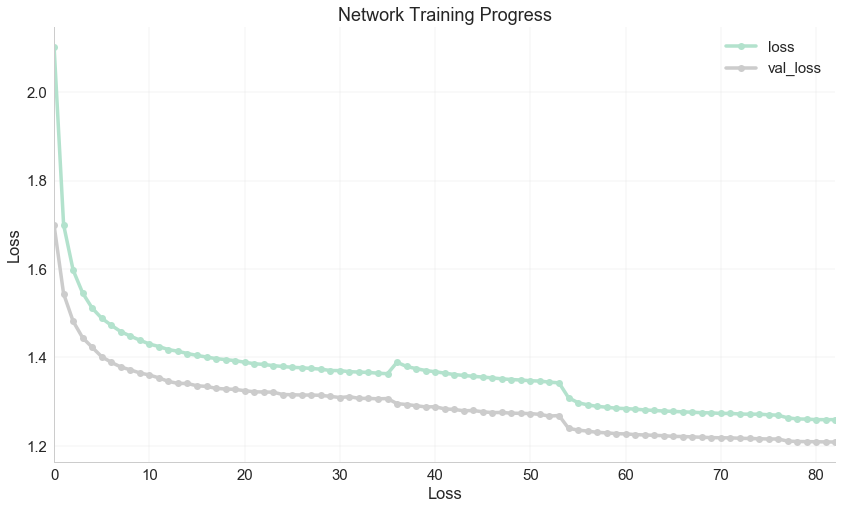

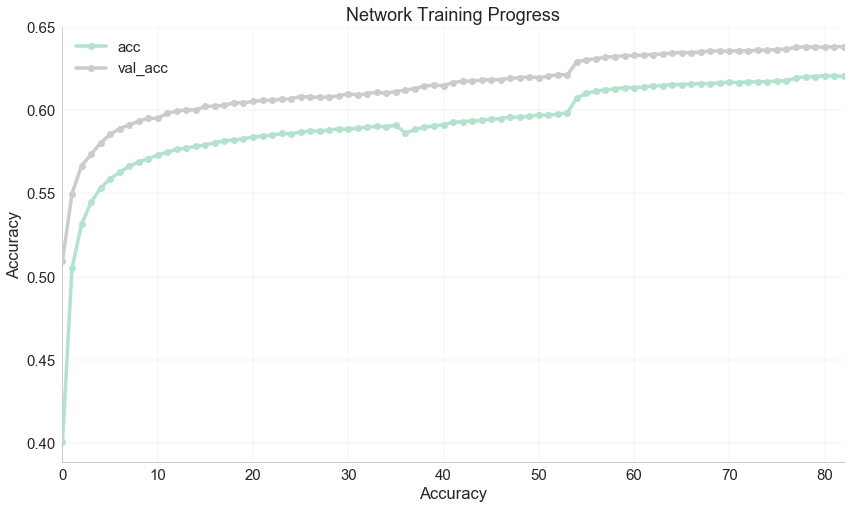

In [9]:
plot_curves(['loss', 'val_loss'], ylabel='Loss')
plot_curves(['acc', 'val_acc'],   ylabel='Accuracy')

# Curve Fit the Loss Function

## Function

$$
f(x) = Ae^{-Bx} + C
$$

In [10]:
def f(x, a, b, c):
    return a * np.exp(-b * x) + c

## Fit the Parameters

In [11]:
x = np.arange(len(df.val_loss.values))
y = df.val_loss.values

(a, b, c), err = sp.optimize.curve_fit(f,  x,  y)

## Check Error

In [12]:
print(a, b, c)
print(err)

0.283685948632 0.0481900909433 1.22220929048
[[  1.83350057e-04   1.60635293e-05  -2.46628376e-05]
 [  1.60635293e-05   3.50293887e-05   4.26894483e-05]
 [ -2.46628376e-05   4.26894483e-05   7.50918916e-05]]


f(x) = 0.284e^-0.048x + 1.222


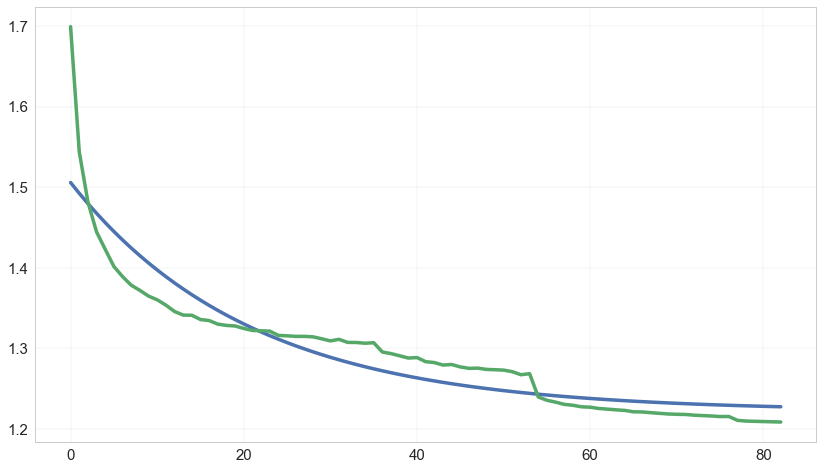

In [13]:
X = np.arange(0, 100)

print('f(x) = {a:.3f}e^-{b:.3f}x + {c:.3f}'.format(a=a,b=b,c=c))
plt.plot(x, f(x, a, b, c))
plt.plot(x, y);

# Check Where Validation Loss Improved

In [14]:
val_loss_diff = pd.Series(df.val_loss.values[:-1] - df.val_loss.values[1:])

val_loss_diff

0     0.1552
1     0.0622
2     0.0373
3     0.0216
4     0.0213
5     0.0125
6     0.0107
7     0.0064
8     0.0071
9     0.0046
10    0.0066
11    0.0079
12    0.0045
13    0.0002
14    0.0053
15    0.0013
16    0.0044
17    0.0016
18    0.0007
19    0.0031
20    0.0024
21    0.0005
22    0.0004
23    0.0053
24    0.0005
25    0.0007
26    0.0000
27    0.0006
28    0.0024
29    0.0026
       ...  
52   -0.0013
53    0.0289
54    0.0041
55    0.0023
56    0.0028
57    0.0011
58    0.0019
59    0.0005
60    0.0016
61    0.0008
62    0.0009
63    0.0007
64    0.0017
65    0.0002
66    0.0009
67    0.0008
68    0.0008
69    0.0004
70    0.0002
71    0.0009
72    0.0005
73    0.0005
74    0.0007
75   -0.0001
76    0.0048
77    0.0009
78    0.0003
79    0.0003
80    0.0003
81    0.0003
Length: 82, dtype: float64

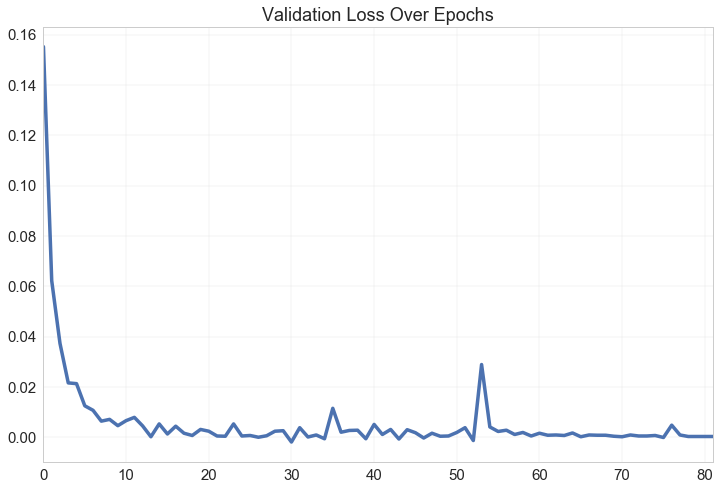

In [15]:
val_loss_diff.plot(figsize=(12,8),
                   title='Validation Loss Over Epochs');